In [1]:
import nltk

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [20]:
paradise = nltk.corpus.gutenberg.words('milton-paradise.txt')
paradise[:50]

['[',
 'Paradise',
 'Lost',
 'by',
 'John',
 'Milton',
 '1667',
 ']',
 'Book',
 'I',
 'Of',
 'Man',
 "'",
 's',
 'first',
 'disobedience',
 ',',
 'and',
 'the',
 'fruit',
 'Of',
 'that',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'Brought',
 'death',
 'into',
 'the',
 'World',
 ',',
 'and',
 'all',
 'our',
 'woe',
 ',',
 'With',
 'loss',
 'of',
 'Eden',
 ',',
 'till',
 'one',
 'greater',
 'Man',
 'Restore',
 'us',
 ',']

In [28]:
# create variable containing stop words
sw = set(nltk.corpus.stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Since Paradise Lost is an older text I thought it especially important to consider context when converting words so I decided to go with lemmatization instead of stemming

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_list = [lemmatizer.lemmatize(x) for x in new_filtered_list]
print(lemmatized_list)
lemmatizer.lemmatize('witnessed')

['doom', 'Reserved', 'wrath', 'thought', 'lost', 'happiness', 'lasting', 'pain', 'Torments', 'round', 'throw', 'baleful', 'eye', 'witnessed', 'huge', 'affliction', 'dismay', 'Mixed', 'obdurate', 'pride', 'steadfast', 'hate']


'witnessed'

In [26]:
filtered_list2 = [w.lower() for w in paradise if w.lower() not in sw]
new_filtered_list2 = [word for word in filtered_list2 if word.isalnum()]
#print(new_filtered_list2)
lemmatized_list2 = [lemmatizer.lemmatize(x) for x in new_filtered_list2]
#print(lemmatized_list2)

In [27]:
from collections import Counter
Counter(lemmatized_list2).most_common(20)

[('heaven', 436),
 ('thou', 432),
 ('thy', 414),
 ('thee', 358),
 ('thus', 318),
 ('god', 316),
 ('shall', 283),
 ('yet', 228),
 ('earth', 217),
 ('though', 217),
 ('u', 187),
 ('man', 176),
 ('first', 175),
 ('day', 157),
 ('high', 153),
 ('one', 142),
 ('son', 132),
 ('far', 129),
 ('death', 127),
 ('may', 126)]

In [36]:
sw.add('thou')
sw.add('thy')
sw.add('thee')
sw.add('thus')
sw.add('us')

filtered_list2 = [w.lower() for w in paradise if w.lower() not in sw]
new_filtered_list2 = [word for word in filtered_list2 if word.isalnum()]
#print(new_filtered_list2)
lemmatized_list2 = [lemmatizer.lemmatize(x) for x in new_filtered_list2]
#print(lemmatized_list2)
top_words = Counter(lemmatized_list2).most_common(20)
top_words

[('heaven', 436),
 ('god', 316),
 ('shall', 283),
 ('yet', 228),
 ('earth', 217),
 ('though', 217),
 ('man', 176),
 ('first', 175),
 ('day', 157),
 ('high', 153),
 ('one', 142),
 ('son', 132),
 ('far', 129),
 ('death', 127),
 ('may', 126),
 ('power', 125),
 ('great', 123),
 ('till', 120),
 ('like', 120),
 ('world', 119)]

In [37]:
import pandas as pd
word_df = pd.DataFrame(top_words, columns=['word', 'count'])
word_df

,word,count
0,heaven,436
1,god,316
2,shall,283
3,yet,228
4,earth,217
5,though,217
6,man,176
7,first,175
8,day,157
9,high,153


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors


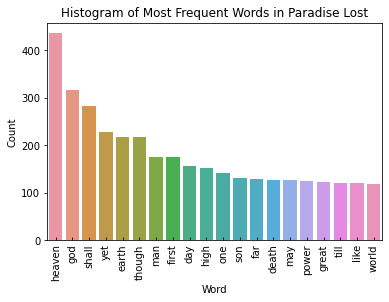

In [62]:
fig, ax = plt.subplots()

#ax.xaxis.set(ticklabels)
ax = sns.barplot(x='word', y='count', data = word_df)
ax.set(title='Histogram of Most Frequent Words in Paradise Lost',
      ylabel='Count',
      xlabel='Word')
ax.tick_params(axis='x', direction='in')
plt.xticks(rotation='vertical')
#ax.set_xticklabels(rotation=45)
plt.show(g)

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

In [87]:
text_sentences = nltk.corpus.gutenberg.sents("milton-paradise.txt")[:10]

#print(text_sentences)

In [82]:
text_block = " ".join(x for x in paradise[:100])
text_block

"[ Paradise Lost by John Milton 1667 ] Book I Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if"

In [89]:
for sentence in text_sentences:
...   print(sentence)
...   ss = analyzer.polarity_scores(sentence)
...   for k in sorted(ss):
...       print('{0}: {1}, '.format(k, ss[k]), end='')
...       print()

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']']


AttributeError: 'list' object has no attribute 'encode'

In [90]:
with open('milton-paradise.txt', 'r') as paradise1:
    paradise_lines = paradise1.readlines()
    paradise_block = ''.join(x.lower() for x in paradise_lines)

FileNotFoundError: [Errno 2] No such file or directory: 'milton-paradise.txt'

In [96]:
paradise = nltk.corpus.gutenberg.sents('milton-paradise.txt')
paradise[1:50]

[['Book', 'I'],
 ['Of',
  'Man',
  "'",
  's',
  'first',
  'disobedience',
  ',',
  'and',
  'the',
  'fruit',
  'Of',
  'that',
  'forbidden',
  'tree',
  'whose',
  'mortal',
  'taste',
  'Brought',
  'death',
  'into',
  'the',
  'World',
  ',',
  'and',
  'all',
  'our',
  'woe',
  ',',
  'With',
  'loss',
  'of',
  'Eden',
  ',',
  'till',
  'one',
  'greater',
  'Man',
  'Restore',
  'us',
  ',',
  'and',
  'regain',
  'the',
  'blissful',
  'seat',
  ',',
  'Sing',
  ',',
  'Heavenly',
  'Muse',
  ',',
  'that',
  ',',
  'on',
  'the',
  'secret',
  'top',
  'Of',
  'Oreb',
  ',',
  'or',
  'of',
  'Sinai',
  ',',
  'didst',
  'inspire',
  'That',
  'shepherd',
  'who',
  'first',
  'taught',
  'the',
  'chosen',
  'seed',
  'In',
  'the',
  'beginning',
  'how',
  'the',
  'heavens',
  'and',
  'earth',
  'Rose',
  'out',
  'of',
  'Chaos',
  ':',
  'or',
  ',',
  'if',
  'Sion',
  'hill',
  'Delight',
  'thee',
  'more',
  ',',
  'and',
  'Siloa',
  "'",
  's',
  'brook',
  '

In [97]:
for sentence in paradise[1:50]:
...   print(sentence)
...   ss = analyzer.polarity_scores(sentence)
...   for k in sorted(ss):
...       print('{0}: {1}, '.format(k, ss[k]), end='')
...       print()

['Book', 'I']


AttributeError: 'list' object has no attribute 'encode'

In [ ]:
#flat_list = [item for sublist in text_sentences for item in sublist]